## 1. Pendulum
다음처럼 주어지는 진자의 운동방정식을 풀어라.$$ \frac{d^2 \theta}{dt^2}  + \frac{g}{L} \sin \theta = 0. $$$\beta$는 마찰의 세기, $L$은 진자의 길이, $g$는 중력가속도이다. 흔히 작은 $\theta$를 가정하고 $\sin\theta \approx \theta$ 근사를 이용하여 해석적인 해를 구한다. 여기에서는 $\sin \theta$를 직접 이용하여 수치해를 구해보자.

2차 미분방정식을 2개의 1차 미분방정식으로 분리하자.$$ \frac{d\theta}{dt} = w, \\
\frac{d w}{dt} = - \frac{g}{L} \sin \theta . $$

$\frac{g}{L}=1$을 가정하고 운동의 해를 구해보자. scipy.integrate.odeint를 포함하여 어떤 방법을 이용하여도 된다.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from math import*

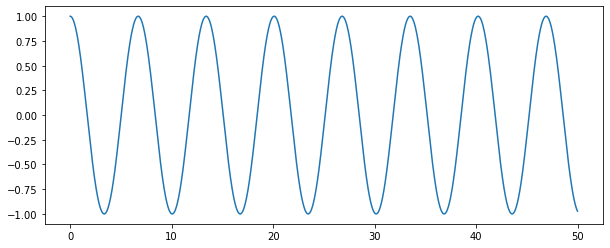

In [2]:
g, L = 9.8, 9.8
state0 = [1.0, 0.0]
t = np.arange(0.0, 50.0, 0.01)

def f(state, t):
    theta, w = state 
    return w, -(g/L)*sin(theta)

states = odeint(f, state0, t)
plt.figure(figsize=(10,4))
plt.plot(t,states[:,0])

## 2. Pendulum (small oscillations)
1번 문제와 같은 진자에 대해 평형점 근처에서 조금씩 진동하고 있는 상황을 고려하자. 그러면
$\sin\theta \approx \theta$ 근사를 적용할 수 있다.

이 경우는 다음과 같은 2개의 1차 미분방정식을 얻는다.$$ \frac{d\theta}{dt} = w, \\
\frac{d w}{dt} =  - \frac{g}{L} \theta . $$

$\frac{g}{L}=1$을 가정하고 운동의 해를 구해보자. scipy.integrate.odeint를 포함하여 어떤 방법을 이용하여도 된다. 초기 조건 $\theta_o, w_o$를 바꾸어 가면서 1번 문제의 결과와 비교해보자.

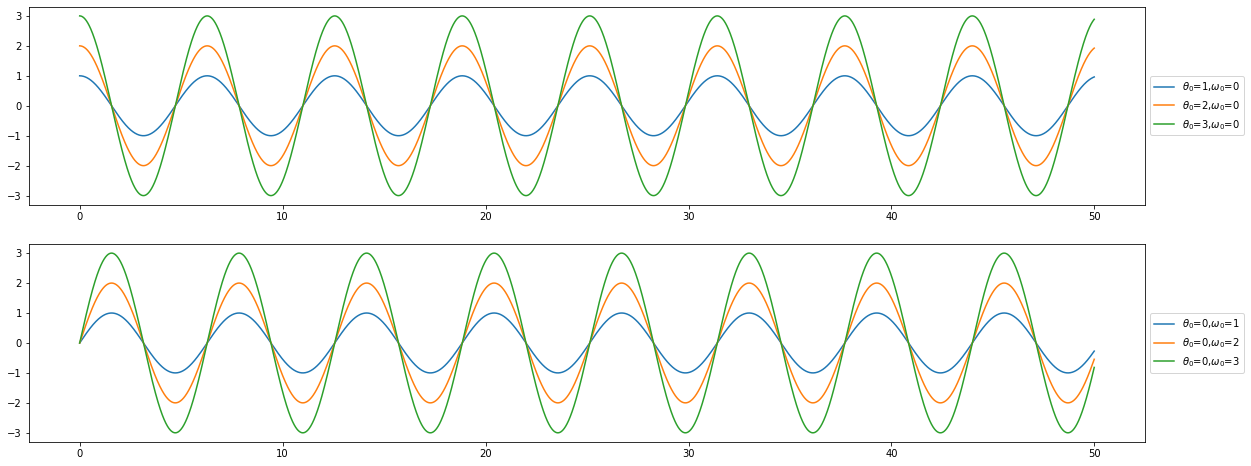

In [3]:
g, L = 9.8, 9.8
state0 = [1.0, 0.0]
state01 = [2.0, 0.0]
state02 = [3.0, 0.0]
state03 = [0.0, 1.0]
state04 = [0.0, 2.0]
state05 = [0.0, 3.0]
t = np.arange(0.0, 50.0, 0.01)

def f(state, t):
    theta, w = state 
    return w, -(g/L)*theta

states = odeint(f, state0, t)
states1 = odeint(f, state01, t)
states2 = odeint(f, state02, t)
states3 = odeint(f, state03, t)
states4 = odeint(f, state04, t)
states5 = odeint(f, state05, t)

plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.plot(t,states[:,0],label='$ \\theta_0 $=1,$\omega_0$=0')
plt.plot(t,states1[:,0],label='$ \\theta_0 $=2,$\omega_0$=0')
plt.plot(t,states2[:,0],label='$ \\theta_0 $=3,$\omega_0$=0')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(2,1,2)
plt.plot(t,states3[:,0],label='$ \\theta_0 $=0,$\omega_0$=1')
plt.plot(t,states4[:,0],label='$ \\theta_0 $=0,$\omega_0$=2')
plt.plot(t,states5[:,0],label='$ \\theta_0 $=0,$\omega_0$=3')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

$\theta_o$는 초기 파동의 시작점을 결정하며 $w_o$=0일 때 $\theta_o$가 n배 됨에 따라 진폭이 n배 된다.

$\theta_o$=0일 때 $w_o$가 n배 됨에 따라 파동의 진폭이 n배 된다.

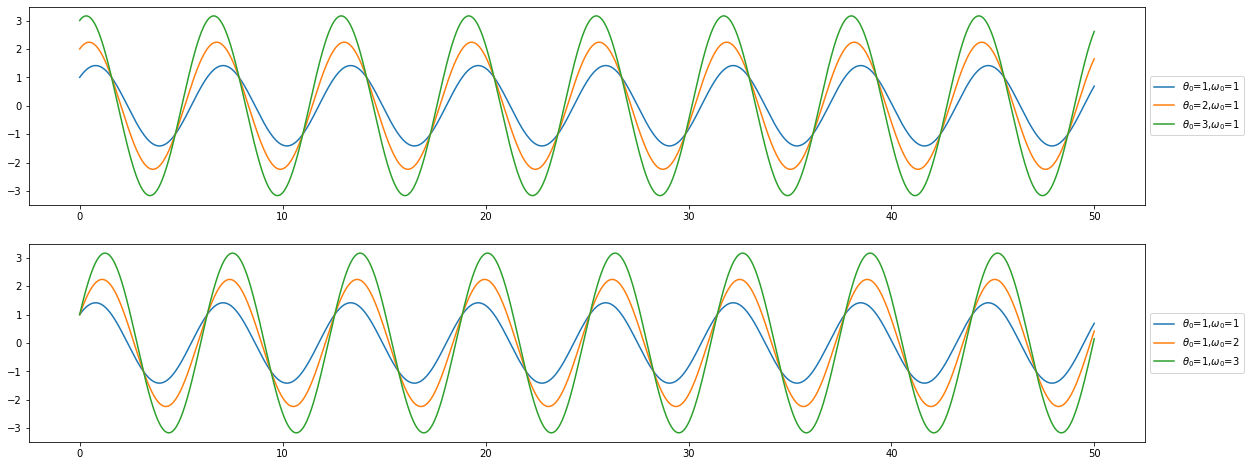

In [4]:
g, L = 9.8, 9.8
state0 = [1.0, 1.0]
state01 = [2.0, 1.0]
state02 = [3.0, 1.0]
state03 = [1.0, 1.0]
state04 = [1.0, 2.0]
state05 = [1.0, 3.0]
t = np.arange(0.0, 50.0, 0.01)

def f(state, t):
    theta, w = state 
    return w, -(g/L)*theta

states = odeint(f, state0, t)
states1 = odeint(f, state01, t)
states2 = odeint(f, state02, t)
states3 = odeint(f, state03, t)
states4 = odeint(f, state04, t)
states5 = odeint(f, state05, t)

plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.plot(t,states[:,0],label='$ \\theta_0 $=1,$\omega_0$=1')
plt.plot(t,states1[:,0],label='$ \\theta_0 $=2,$\omega_0$=1')
plt.plot(t,states2[:,0],label='$ \\theta_0 $=3,$\omega_0$=1')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(2,1,2)
plt.plot(t,states3[:,0],label='$ \\theta_0 $=1,$\omega_0$=1')
plt.plot(t,states4[:,0],label='$ \\theta_0 $=1,$\omega_0$=2')
plt.plot(t,states5[:,0],label='$ \\theta_0 $=1,$\omega_0$=3')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

$\theta_o$, $w_o$가 0이 아니라면 $\theta_o$가 커질수록 위상이 빨라지고 $w_o$가 커질수록 위상이 느려진다.

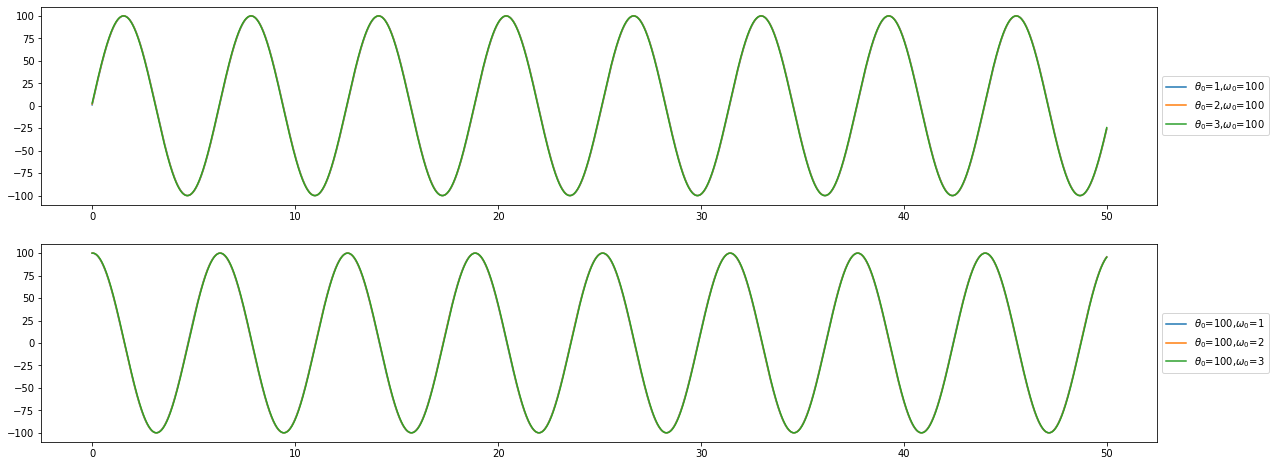

In [5]:
g, L = 9.8, 9.8
state0 = [1.0, 100.0]
state01 = [2.0, 100.0]
state02 = [3.0, 100.0]
state03 = [100.0, 1.0]
state04 = [100.0, 2.0]
state05 = [100.0, 3.0]
t = np.arange(0.0, 50.0, 0.01)

def f(state, t):
    theta, w = state 
    return w, -(g/L)*theta

states = odeint(f, state0, t)
states1 = odeint(f, state01, t)
states2 = odeint(f, state02, t)
states3 = odeint(f, state03, t)
states4 = odeint(f, state04, t)
states5 = odeint(f, state05, t)

plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.plot(t,states[:,0],label='$ \\theta_0 $=1,$\omega_0$=100')
plt.plot(t,states1[:,0],label='$ \\theta_0 $=2,$\omega_0$=100')
plt.plot(t,states2[:,0],label='$ \\theta_0 $=3,$\omega_0$=100')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(2,1,2)
plt.plot(t,states3[:,0],label='$ \\theta_0 $=100,$\omega_0$=1')
plt.plot(t,states4[:,0],label='$ \\theta_0 $=100,$\omega_0$=2')
plt.plot(t,states5[:,0],label='$ \\theta_0 $=100,$\omega_0$=3')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

$\theta_o$>>$w_o$ 또는 $\theta_o$<<$w_o$ 라면 작은 $\theta_o$, $w_o$의 값이 무시된다.

## 3. Damped Pendulum
다음처럼 주어지는 damped 진자의 운동방정식을 풀어라.$$ \frac{d^2 \theta}{dt^2} + \beta \frac{d \theta}{dt} + \frac{g}{L} \sin \theta = 0. $$$\beta$는 마찰의 세기, $L$은 진자의 길이, $g$는 중력가속도이다.

우선 2차 미분방정식을 2개의 1차 미분방정식으로 분리해 보자.$$ \frac{d\theta}{dt} = w, \\
\frac{d w}{dt} = - \beta w - \frac{g}{L} \sin \theta . $$

초기 상태는 $\theta_0 = 1, w_0 =0$이며 $\beta=0.1, \frac{g}{L}=1$을 가정하고 운동의 해를 구해보자. scipy.integrate.odeint를 포함하여 어떤 방법을 이용하여도 된다.

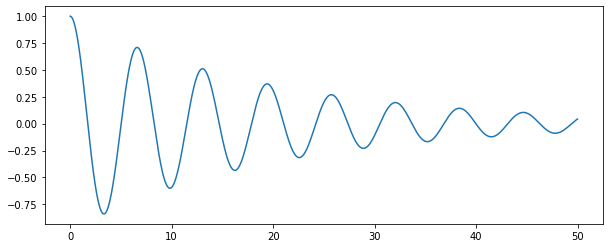

In [6]:
beta, g, L = 0.1, 9.8, 9.8
state0 = [1.0, 0.0]
t = np.arange(0.0, 50.0, 0.01)
def f(state, t):
    theta, w = state 
    return w, -beta*w-(g/L)*sin(theta)

states = odeint(f, state0, t)
plt.figure(figsize=(10,4))
plt.plot(t,states[:,0])

## 4. Forced Pendulum
다음처럼 주어지는 forced 진자의 운동방정식을 풀어라.$$ \frac{d^2 \theta}{dt^2} + \beta \frac{d \theta}{dt} + \frac{g}{L} \sin \theta = A \cos (v t). $$$\beta$는 마찰의 세기, $L$은 진자의 길이, $g$는 중력가속도, $A$는 외부에서 주어지는 힘의 진폭, $v$는 외부에서 주어지는 힘의 진동수이다.

forced 진자의 움직임을 구해보고 $v$의 효과에 대해 살펴보아라.

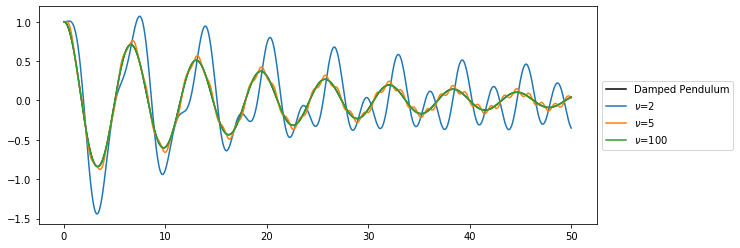

In [7]:
beta, g, L, A, nu ,nu1, nu2 = 0.1, 9.8, 9.8, 1, 2, 5, 100
state0 = [1.0, 0.0]
t = np.arange(0.0, 50.0, 0.01)

def f(state, t):
    theta, w = state 
    return w, -beta*w-(g/L)*sin(theta)
def f1(state, t):
    theta, w = state 
    return w, A*cos(nu*t)-beta*w-(g/L)*sin(theta)
def f2(state, t):
    theta, w = state 
    return w, A*cos(nu1*t)-beta*w-(g/L)*sin(theta)
def f3(state, t):
    theta, w = state 
    return w, A*cos(nu2*t)-beta*w-(g/L)*sin(theta)


states = odeint(f, state0, t)
states1 = odeint(f1, state0, t)
states2 = odeint(f2, state0, t)
states3 = odeint(f3, state0, t)

plt.figure(figsize=(10,4))
plt.plot(t,states[:,0], color='black', label='Damped Pendulum')
plt.plot(t,states1[:,0],label='$ \\nu $=2')
plt.plot(t,states2[:,0],label='$ \\nu $=5')
plt.plot(t,states3[:,0],label='$ \\nu $=100')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

$\nu$가 커질수록 $Acos(\nu t)=0$인 damped 진자의 운동과 같아진다.

-2

2번 문항에서 theta를 썼을 때와 np.sin(theta)를 썼을 때의 비교가 없고

4번 문항에서 제출한 내용은 v의 효과가 사실상 없는 경우